<a href="https://colab.research.google.com/github/luisjexp/tchBIOMACH/blob/main/feature_tuning_curve_current.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orientation Tuned Cells
All known mammals have visual neurons, or 'units', that are *tuned to the orientation*  of elongated stimuli. Any time you turn your gaze towards a grating made up of vertical bars, a set of neurons in your brain begin are activated. 

There are several key properties about these cells...
> A neuron is said to be **tuned to orientation** if it respond specifically to a stimulus is elongated, not stimulus that is circular in shape

> These neurons also exhibit a **base line** level of activation, firing every so often, even when not being stimluated.

> Each unit has a **preferred orientation**. It fires the most when a stimulus is at a particular orientation. Different units have different preferred orientations.

> Although a unit has a preferred orientation, it will also respond, though less strongly, to stimuli in somewhat different directions. The strength of the unit's response is inversely related to the difference between its preferred orientation and the orientation of the stimulus. The larger the difference, the weaker the response. 



Here we will visualize these properties using a plot known as the **orientation tuning curve**. Such tuning curves describe a neurons response to an oriented stimulus, like a bar or a grating. We will draw several tuning curves for a network of cells each with a unique orientation preferenc. 

# The Bell Shaped Tuning Curve
The tuning curve is a stimulus-response function. There are many ways we can draw this function, but we will stick with the most classical function: a simple bell curve, also known as a **gaussian**. We can draw a gaussian by modifying two simple settings: the center, and the spread.

### The Center
The neuron will respond most to its preferred stimulus, so we will set the center of the gaussian over its preffered orienation. 

### The Spread
A neuron also responds to stimulus orientations that deviate from the preffered. The spread of the guassian tells us exactly how different other orientations need to be from the preffered to eliicit a response. We will set the spread to 15 degrees. This means the neuron mostly responds to orientations +/- 15 degrees from the preffered; anything beyond that orientation elicits a very weak response.

## Create A tuning curve network 
We we create a population of visual neurons. Each neuron will have a tuning curve that desribes how it responds to an orientated stimulus. Different cells will have different orientaiton preferences. All will have the same **tuning width**. 


In [3]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#Creating the tuning function.
def normal_dist(ori_vals, center , spread):
    Y = np.exp(-0.5*((ori_vals-center)/spread)**2)
    return Y

# Create tuning curves 
ori_vals = np.arange(0,180,10)
num_orientations = len(ori_vals)

# we want 15 neurons with different orientation preferences
# that evenly span all orientations (from 1 - 180 degrees)
num_cells = 15
ori_pref_list = np.linspace(1,180,num_cells)

# all of their tuning curves have a spread/width of 15
tun_curve_width = 15
data = []
for k, n in enumerate(ori_pref_list):
  response = normal_dist(ori_vals,n,tun_curve_width)
  data.append(dict(zip(ori_vals, response)))

df = pd.DataFrame(data) 


# display dataframe as an heatmap 
df.style.background_gradient(cmap ='viridis')\
.set_properties(**{'font-size': '5px'})



,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,0.997780,0.835270,0.448332,0.154295,0.034047,0.004817,0.000437,0.000025,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.655521,0.968654,0.917763,0.557536,0.217168,0.054237,0.008685,0.000892,0.000059,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.208258,0.543215,0.908497,0.974216,0.669834,0.295297,0.083470,0.015128,0.001758,0.000131,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.031995,0.147312,0.434889,0.823189,0.999082,0.777469,0.387922,0.124104,0.025457,0.003348,0.000282,0.000015,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002377,0.019318,0.100669,0.336361,0.720605,0.989848,0.871806,0.492325,0.178264,0.041386,0.006161,0.000588,0.000036,0.000001,0.000000,0.000000,0.000000,0.000000
5,0.000085,0.001225,0.011269,0.066462,0.251336,0.609419,0.947451,0.944448,0.603642,0.247378,0.065002,0.010951,0.001183,0.000082,0.000004,0.000000,0.000000,0.000000
6,0.000001,0.000038,0.000610,0.006350,0.042391,0.181437,0.497916,0.876126,0.988457,0.715038,0.331651,0.098631,0.018807,0.002299,0.000180,0.000009,0.000000,0.000000
7,0.000000,0.000001,0.000016,0.000293,0.003457,0.026121,0.126537,0.393022,0.782705,0.999445,0.818276,0.429557,0.144585,0.031204,0.004318,0.000383,0.000022,0.000001
8,0.000000,0.000000,0.000000,0.000007,0.000136,0.001819,0.015550,0.085257,0.299709,0.675539,0.976295,0.904673,0.537505,0.204764,0.050016,0.007833,0.000787,0.000051
9,0.000000,0.000000,0.000000,0.000000,0.000003,0.000061,0.000924,0.008943,0.055496,0.220802,0.563279,0.921349,0.966284,0.649779,0.280161,0.077451,0.013729,0.001560


*Lets* take a look at each row in the above heatmap. 

There are 15 rows, one for each neuron. The color of the map tells us how strongly a neuron responds when presented with a particular orientation. The column tell us the orientation of the stimulus.

## Single cell tuning curves
Lets look at the tuning curve of a single cell, the 9th on (10th row). We can easily plot it just taking a horizontal slice of the map above.

Text(0, 0.5, 'Neurons Response')

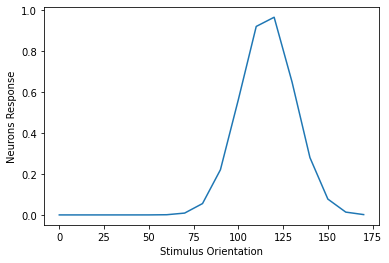

In [4]:
# plot the horizontal slice
df.iloc[9].plot()
plt.xlabel('Stimulus Orientation')
plt.ylabel('Neurons Response')

The x-axis is the orientation of a stimulus . The y axis is in arbitrry units, where values of 1 means the neuron is responding at its maximum. Notice that the response is bell shaped. 

The maximum response occurs when the stimulus is tilted at about 120 degrees. Thus the cell has an orientation preference of 120 degrees. This is the center of the gaussian curve. 

Also note that it weakly to responds when the orientation is exceeds +/-15 degrees from its preffered orientation. This is because we set the width of the curve to be 15 degrees.

Now lets plot all the curves...

Text(0, 0.5, 'Neurons Response')

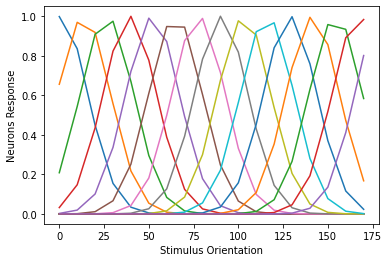

In [5]:
for k, n in enumerate(ori_pref_list):
  df.iloc[k].plot()

plt.xlabel('Stimulus Orientation')
plt.ylabel('Neurons Response')

In front of us is a **population** of visual cells. Each cell responds in its own way to a stimulus, and this response is modeled as a bell shaped tuning curve, centered around the preferred stimulus of that cell. Notice that our population of neurons have orientation preferences that evenly span  all orientations (from 1 - 180 degrees)



## Population responses
Now lets draw a plot that describes how such a population responds to some arbitrary stimulus. All we need to do is take a vertical slice of the heat map. Lets see how the population of cells responds to a stimulus orientated at 90 degrees (the 10th column)


In [58]:
# plot the horizontal slice
df[2:]


,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
2,2.082576e-01,5.432154e-01,9.084970e-01,9.742158e-01,6.698338e-01,2.952971e-01,8.347022e-02,1.512809e-02,1.757992e-03,1.309876e-04,6.257824e-06,1.916889e-07,3.764876e-09,4.741160e-11,3.828237e-13,1.981953e-15,6.579122e-18,1.400306e-20
3,3.199460e-02,1.473118e-01,4.348890e-01,8.231892e-01,9.990821e-01,7.774686e-01,3.879223e-01,1.241043e-01,2.545712e-02,3.348204e-03,2.823546e-04,1.526715e-05,5.292992e-07,1.176589e-08,1.676983e-10,1.532543e-12,8.980009e-15,3.373815e-17
4,2.376919e-03,1.931812e-02,1.006689e-01,3.363614e-01,7.206048e-01,9.898478e-01,8.718061e-01,4.923247e-01,1.782640e-01,4.138622e-02,6.160674e-03,5.880048e-04,3.598435e-05,1.411974e-06,3.552386e-08,5.730516e-10,5.927172e-12,3.930805e-14
5,8.539139e-05,1.225050e-03,1.126871e-02,6.646216e-02,2.513362e-01,6.094189e-01,9.474514e-01,9.444484e-01,6.036424e-01,2.473783e-01,6.500152e-02,1.095130e-02,1.183009e-03,8.193903e-05,3.638930e-06,1.036184e-07,1.891822e-09,2.214643e-11
6,1.483459e-06,3.756688e-05,6.099789e-04,6.350454e-03,4.239112e-02,1.814368e-01,4.979158e-01,8.761264e-01,9.884572e-01,7.150381e-01,3.316505e-01,9.863078e-02,1.880721e-02,2.299412e-03,1.802558e-04,9.060285e-06,2.919946e-07,6.033759e-09
7,1.246233e-08,5.570808e-07,1.596678e-05,2.934249e-04,3.457456e-03,2.612141e-02,1.265368e-01,3.930223e-01,7.827045e-01,9.994446e-01,8.182760e-01,4.295574e-01,1.445848e-01,3.120359e-02,4.317840e-03,3.830970e-04,2.179372e-05,7.949394e-07
8,5.062728e-11,3.994783e-09,2.021073e-07,6.556183e-06,1.363642e-04,1.818569e-03,1.555033e-02,8.525691e-02,2.997090e-01,6.755387e-01,9.762946e-01,9.046733e-01,5.375055e-01,2.047643e-01,5.001564e-02,7.833172e-03,7.865923e-04,5.064563e-05
9,9.945621e-14,1.385256e-11,1.237110e-09,7.083813e-08,2.600794e-06,6.122446e-05,9.241113e-04,8.943424e-03,5.549625e-02,2.208023e-01,5.632794e-01,9.213493e-01,9.662844e-01,6.497793e-01,2.801606e-01,7.745125e-02,1.372872e-02,1.560314e-03
10,9.448028e-17,2.322891e-14,3.661819e-12,3.701221e-10,2.398686e-08,9.967404e-07,2.655651e-05,4.536700e-04,4.969233e-03,3.489948e-02,1.571552e-01,4.537522e-01,8.400188e-01,9.971017e-01,7.588749e-01,3.703234e-01,1.158703e-01,2.324576e-02
11,4.340226e-20,1.883604e-17,5.241398e-15,9.351577e-13,1.069801e-10,7.846953e-09,3.690451e-07,1.112854e-05,2.151677e-04,2.667449e-03,2.120291e-02,1.080625e-01,3.531302e-01,7.399033e-01,9.940202e-01,8.562404e-01,4.729078e-01,1.674702e-01


The x-axis is an ID that we assigned to the neuron (there are 15 neurons, so there are 15 IDs). The y axis is in arbitrry units, where values of 1 means the neuron is responding at its maximum. 

Notice that some neurons respond strongly to the 90 degree stimulus - especially the neuron with an orientation preferenec of 90 degrees, while others are relatively silent (such as the one with a preference of 0 degrees). 

Further more, this distribution is bell shaped! In other words the distribution of the population response is the same as the shape of the tuning curves of each individual cell. 